# Regresión lineal simple y múltiple y regresión no lineal

Por Ing. Wilson Castro Z.

In [1]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf

Coeficiente de correlacion de Pearson 0.6348372675331257
[472.53807107 408.12182741 424.22588832 408.12182741 440.32994924
 504.74619289 472.53807107 408.12182741 504.74619289 472.53807107
 424.22588832 504.74619289]


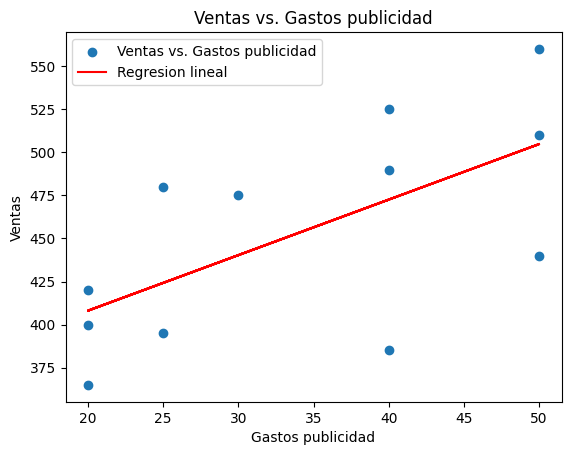

Pendiente: 3.2208121827411156
Interseccion: 343.7055837563452


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ventas = np.array([385,400,395,365,475,440,490,420,560,525,480,510])
gastos_publicidad = np.array([40,20,25,20,30,50,40,20,50,40,25,50])
coef_correlacion = np.corrcoef(ventas, gastos_publicidad)[0,1]
print(f"Coeficiente de correlacion de Pearson {coef_correlacion}")
# creamos el modelo
model = LinearRegression()
# ajustar el modelo
model.fit(gastos_publicidad.reshape(-1,1),ventas)
# coef pendiente y la interseccion
pendiente = model.coef_[0]
interseccion = model.intercept_
# generamos las predicciones
ventas_pred = model.predict(gastos_publicidad.reshape(-1,1))
print(ventas_pred)
# grafica
plt.scatter(gastos_publicidad,ventas,label='Ventas vs. Gastos publicidad')
plt.plot(gastos_publicidad,ventas_pred,color='red',label='Regresion lineal')
plt.xlabel('Gastos publicidad')
plt.ylabel('Ventas')
plt.title("Ventas vs. Gastos publicidad")
plt.legend()
plt.show()
# mostramos valores
print(f'Pendiente: {pendiente}')
print(f'Interseccion: {interseccion}')

Por cada dólar que se invierte en publicidad, se incrementan las ventas en $3.22

Si no se invierte en publicidad ($0 en publicidad) las ventas son alrededor de $343.71

## Datasets de la librería faraway

In [2]:
pip install faraway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.4 MB/s eta 0:00:00


Se va a analizar el dataset pima. No obstante, este tiene varias variables con muchos registros en cero que se deben cambiar por null, pero aún así dificulta el modelo lineal. Se incluye un dataset sin ceros para su correcto análisis.

In [13]:
#import faraway.datasets.pima
#pima=faraway.datasets.pima.load()
ruta='/content/drive/MyDrive/data/pima-indians-diabetesNotNulls.csv'
pima = pd.read_csv(ruta,sep=';')

In [7]:
#descripcion del dataset pima
pima.describe()

pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         diabetes         age        test  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25%      0.269750   23.000000    0.000000  
50%      0.449500   27.000000    0.000000  
75%      0.687000   36.000000    1.000000  
max      2.420000   81.000000    1.000000

La función de pedigrí de la diabetes (DPF) estima la probabilidad de diabetes en función de la edad del sujeto y sus antecedentes familiares diabéticos, que se consideran los principales factores de riesgo de la enfermedad de diabetes. La historia clínica familiar revela importante información genómica, que caracteriza las interacciones conjuntas entre factores conductuales, ambientales y genéticos. En la práctica, se encuentra en la sociedad que un paciente diabético tipo 2 tiene algunos de sus familiares como un hermano o un con diabetes tipo 2 (DT2). Pero no existe una prueba estándar de que la diabetes tipo 2 pueda reconocerse como una enfermedad hereditaria.

In [8]:
pima.head()

pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  test
0         1       89         66       23       94  28.1     0.167   21     0
1         0      137         40       35      168  43.1     2.288   33     1
2         3       78         50       32       88  31.0     0.248   26     1
3         2      197         70       45      543  30.5     0.158   53     1
4         1      189         60       23      846  30.1     0.398   59     1

In [9]:
pima.dtypes

pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test           int64
dtype: object

El análisis de regresión tiene dos objetivos principales:

1. Predicción de respuestas futuras o no vistas dados valores específicos de los predictores.

2. Evaluación del efecto o relación entre las variables explicativas y la respuesta. Nos gustaría inferir relaciones causales si es posible.

In [10]:
pima.describe().round(1)

pregnant  glucose  diastolic  triceps  insulin    bmi  diabetes    age  \
count     392.0    392.0      392.0    392.0    392.0  392.0     392.0  392.0   
mean        3.3    122.6       70.7     29.1    156.1   33.1       0.5   30.9   
std         3.2     30.9       12.5     10.5    118.8    7.0       0.3   10.2   
min         0.0     56.0       24.0      7.0     14.0   18.2       0.1   21.0   
25%         1.0     99.0       62.0     21.0     76.8   28.4       0.3   23.0   
50%         2.0    119.0       70.0     29.0    125.5   33.2       0.4   27.0   
75%         5.0    143.0       78.0     37.0    190.0   37.1       0.7   36.0   
max        17.0    198.0      110.0     63.0    846.0   67.1       2.4   81.0   

        test  
count  392.0  
mean     0.3  
std      0.5  
min      0.0  
25%      0.0  
50%      0.0  
75%      1.0  
max      1.0

In [11]:
#la presión sanguínea afecta a la salud:
pima['diastolic'].sort_values().head(10)

307    24
7      30
57     30
308    38
1      40
300    44
299    44
380    44
173    46
362    46
Name: diastolic, dtype: int64

In [12]:
#Se observa en el dataset original que varios registros son cero, cuantos con cero?
np.sum(pima['diastolic']==0)

0

Se muestra a continuación la situación con el datase original y como evitar los ceros.

Por alguna razon los investigadores no obtuvieron la presion sanguinea de 35 personas.

Como esto afecta el análisis, se va a colocar NULL a las variables con los valores Cero


In [ ]:
#pima.replace({'diastolic':0,'triceps':0,'insulin':0,'glucose':0,'bmi':0},np.nan,inplace=True)

In [ ]:
#De nuevo el resumen de estadisticos y se puede comparar con el anterior
#pima.describe().round(1)

In [13]:
#la variable test es categorica no numerica, luego no tiene sentido los estadisticos
pima['test']=pima['test'].astype('category')
pima['test']=pima['test'].cat.rename_categories(
    ['Negative','Positive'])
pima['test'].value_counts()

Negative    262
Positive    130
Name: test, dtype: int64

In [14]:
pima['test'].describe()

count          392
unique           2
top       Negative
freq           262
Name: test, dtype: object

In [15]:
#En el resumen de estadisticas Ya no aparece 'test'
pima.describe().round(1)

pregnant  glucose  diastolic  triceps  insulin    bmi  diabetes    age
count     392.0    392.0      392.0    392.0    392.0  392.0     392.0  392.0
mean        3.3    122.6       70.7     29.1    156.1   33.1       0.5   30.9
std         3.2     30.9       12.5     10.5    118.8    7.0       0.3   10.2
min         0.0     56.0       24.0      7.0     14.0   18.2       0.1   21.0
25%         1.0     99.0       62.0     21.0     76.8   28.4       0.3   23.0
50%         2.0    119.0       70.0     29.0    125.5   33.2       0.4   27.0
75%         5.0    143.0       78.0     37.0    190.0   37.1       0.7   36.0
max        17.0    198.0      110.0     63.0    846.0   67.1       2.4   81.0

In [16]:
# Verificar en dtypes:
pima.dtypes

pregnant        int64
glucose         int64
diastolic       int64
triceps         int64
insulin         int64
bmi           float64
diabetes      float64
age             int64
test         category
dtype: object

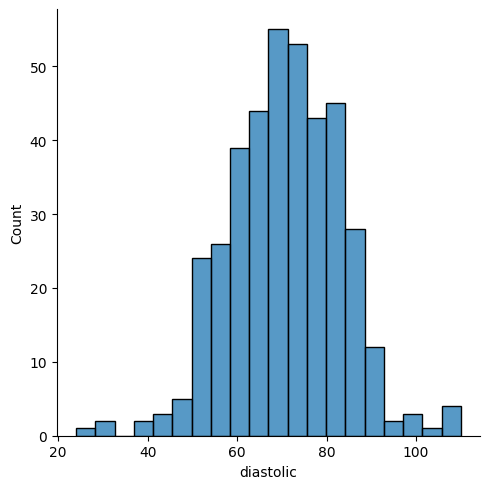

In [19]:
sns.displot(pima['diastolic'])

<Axes: xlabel='diastolic', ylabel='Count'>

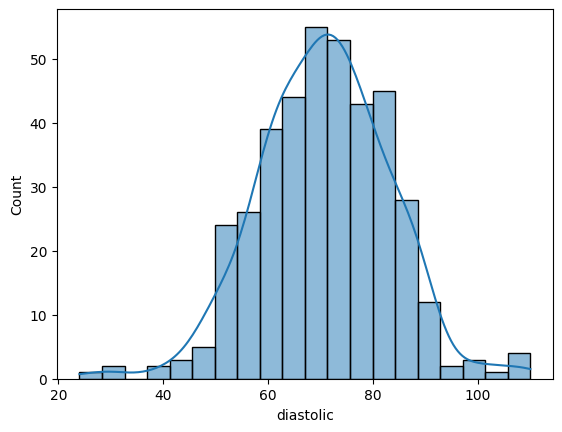

In [20]:
#Both new functions support the kernel density estimate line, by passing kde=True:
sns.histplot(pima['diastolic'].dropna(),kde=True)

<Axes: >

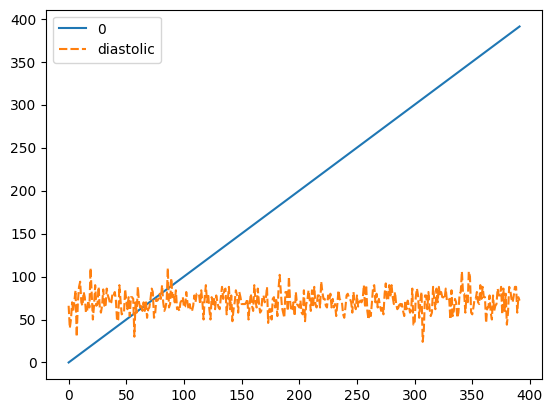

In [21]:
#Una alternativa simple es graficar los datos ordenados vs. el indice
pimad=pima.diastolic.dropna().sort_values()
sns.lineplot(data=(range(0,len(pimad)),pimad))

<Axes: xlabel='diastolic', ylabel='diabetes'>

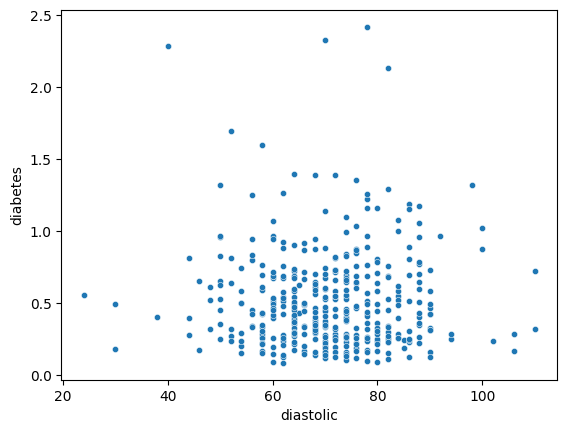

In [22]:
#Ahora un par de 'bivariate plots'
sns.scatterplot(x='diastolic',y='diabetes',data=pima,s=20)

<Axes: xlabel='test', ylabel='diabetes'>

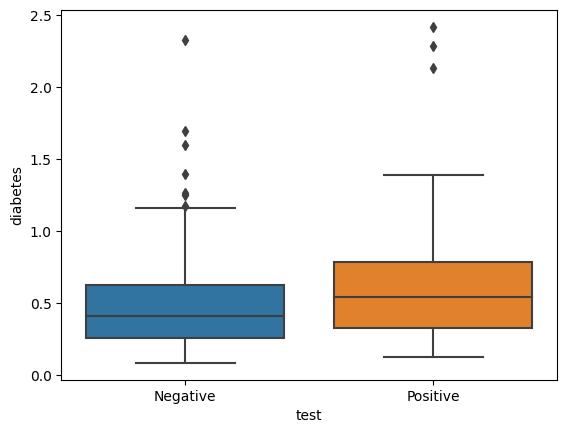

In [23]:
sns.boxplot(x='test',y='diabetes',data=pima)

Algunas veces necesitamos agregar una tercera variable en un gráfico bivariado.

<Axes: xlabel='diastolic', ylabel='diabetes'>

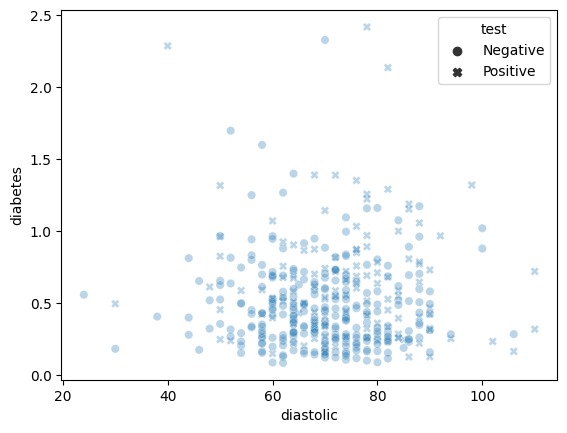

In [24]:
sns.scatterplot(x='diastolic',y='diabetes',data=pima,
                style = "test",alpha=0.3)

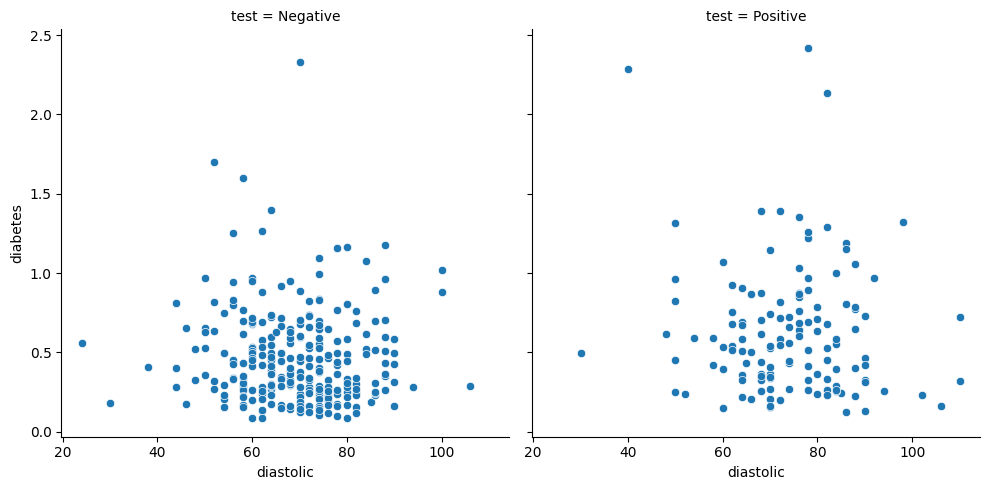

In [25]:
sns.relplot(x='diastolic',y='diabetes',data=pima,
                col = "test")

## Modelo lineal

In [26]:
mod0 = smf.ols('diabetes ~ diastolic',pima).fit()
mod0.params

Intercept    0.554248
diastolic   -0.000442
dtype: float64

In [27]:
cor = sp.stats.pearsonr(pima['diabetes'].dropna(),pima['diastolic'].dropna())[0]
cor

-0.01597110350582248

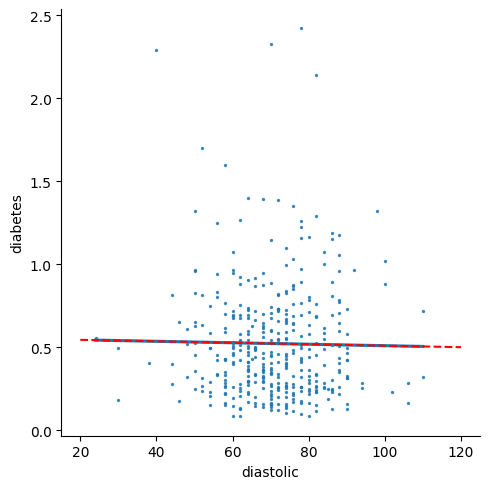

In [33]:
b0,b1=0.554248,-0.000442
sns.lmplot(x='diastolic',y='diabetes',data=pima,ci=None,scatter_kws={'s':2})
xr = np.array([20,120])
plt.plot(xr,b0+xr*b1,'--r')

## Dataset families the faraway

In [3]:
import faraway.datasets.families
families = faraway.datasets.families.load()
families.head()

family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5

<Axes: xlabel='midparentHeight', ylabel='childHeight'>

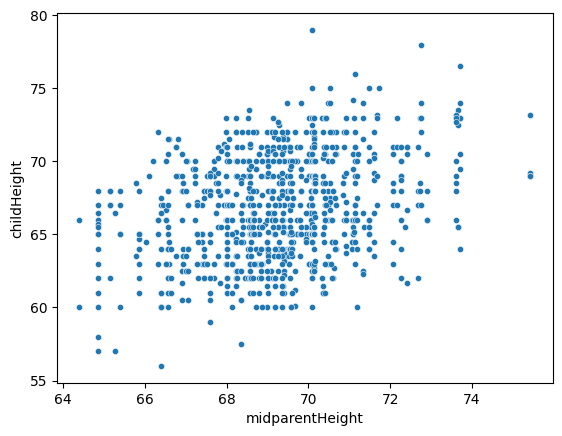

In [4]:
sns.scatterplot(x='midparentHeight',y='childHeight',data=families,s=20)

Ahora se puede proponer una relación lineal entre las dos variables en la forma:

$childHeight = b_0 + b_1midparentHeight + e$

In [5]:
mod = smf.ols('childHeight ~ midparentHeight',families).fit()
mod.params

Intercept          22.636241
midparentHeight     0.637361
dtype: float64

Para el caso más sencillo de la respuesta $y$ con una sola variable explicativa $x$, se puede escribir la ecuación en la forma:

$\frac{y-\bar{y}}{Sy}=r\ \frac{x-\bar{x}}{Sx}$

Donde:

- $S_x$: Desviación estándar de la variable predictora (o explicativa) $x$.

- $S_y$: Desviación estándar de la variable respuesta $y$.

- $r$ es la correlación entre $x$ e $y$.

La ecuación se puede expresar en términos como: la respuesta en unidades estándar es la correlación multiplicada por el predictor en unidades estándar.

Se puede verificar que esta ecuación produce los mismos resultados anteriores reorganizando la ecuación en la forma:

$y = b_0 + b_1x$

y calculando los estimadores (coeficientes de correlación)

In [7]:
cor = sp.stats.pearsonr(families['childHeight'],
                        families['midparentHeight'])[0]
cor

0.3209498960639593

In [9]:
Sy = np.std(families['childHeight'])
Sx = np.std(families['midparentHeight'])
b1 = cor*Sy/Sx
b0 = np.mean(families['childHeight']-
                b1*np.mean(families['midparentHeight']))
np.round([b0,b1],2)
print(f'b0 = {b0}\nb1 = {b1}')

b0 = 22.636240549589747
b1 = 0.6373608969694791


In [11]:
b1 = Sy/Sx
b0 = np.mean(families['childHeight']- \
                b1*np.mean(families['midparentHeight']))

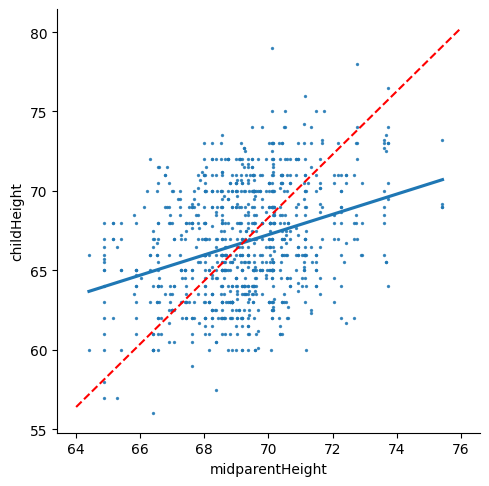

In [12]:
sns.lmplot(x='midparentHeight',y='childHeight',data=families,ci=None,scatter_kws={'s':2})
xr = np.array([64,76])
plt.plot(xr,b0+xr*b1,'--r')

# Regresión lineal múltiple

En este modelo, se tienen varias variables predictoras, independientes o explicativas $x_1, x_2, …, x_k$ y una sola variable respuesta $y$.

La ecuación de regresión múltiple es:

$\hat{y} = b_0+b_1x_1+b_2x_2+b_kx_k$

## Análisis regresión múltiple con un Dataset

Desde el módulo sklearn usaremos el método LinearRegression() para crear un objeto de regresión lineal.

Este objeto tiene un método llamado fit() que toma los valores independientes y dependientes como parámetros y llena el objeto de regresión con datos que describen la relación:

In [34]:
ruta='/content/drive/MyDrive/data/cars.csv'
cars = pd.read_csv(ruta,sep=',')
print(len(cars['Car']))
cars.head(5)

36


Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105

In [35]:
cars.describe()

Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

Ahora se realiza una lista en la variable X de las valores de las variables predictoras/explicativas o independientes.

En la variable dependiente y se colocan los valores de esta variable.


In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [37]:
#predecir la emisión de CO2 de un carro con un peso de 2300kg, y un volumen de 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])
print(f'Emision de CO2 para \nweight: 2300kg\nVolume: 1300cm3\n{predictedCO2}')

Emision de CO2 para 
weight: 2300kg
Volume: 1300cm3
[107.2087328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Hemos pronosticado que un coche con motor de 1,3 litros y un peso de 2.300 kg liberará aproximadamente 107 gramos de CO2 por cada kilómetro que recorra.

In [38]:
# imprimir los coeficientes de correlación.
print(regr.coef_)

[0.00755095 0.00780526]


Estos valores nos dicen que si el peso aumenta en 1 kg, la emisión de CO2 aumenta en 0,00755095 g.

Y si el tamaño del motor (Volumen) aumenta en 1 cm3, las emisiones de CO2 aumentan en 0,00780526 g.

## Ejemplo 2. Dataset pima

Con el dataset pima, la regresión con la diastólica y el BMI como X y la diabetes como Y sería una regresión múltiple que implicaría únicamente variables cuantitativas y es la que abordaremos primero.

In [17]:
X = pima[['diastolic','bmi']]
y = pima['diabetes']

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [19]:
# imprimir los coeficientes de correlación.
print(regr.coef_)

[-0.00195934  0.0088659 ]


Estos valores nos dicen que si la presión diastólica aumenta en una unidad, la variable diabetes disminuye en 0.00196. Si el bmi aumenta en una unidad, la variable diabetes aumenta en 0.0089

## MÉTODO MATRICIAL


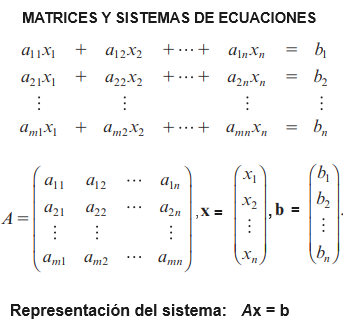

## Sistemas no lineales y Múltiples

## Ajustar un polinomio

$f(x) = b0 + b_1x + b_2x^2$

## Ajustar una función de varias variables:

$f(x) = b0 + b_1x_1 + b_2x_2 + b_3x_3$

En todos estos casos, genere una matriz X con una columna de 1 y con las demás variables, por ej. para dos variables $X_1$ y $X_2$:

$X=\left(\begin{matrix}1&x_{11}&x_{21}\\1&x_{12}&x_{22}\\1&x_{13}&x_{23}\\\end{matrix}\right)$

Luego encuentre la inversa X':

$X^\prime=\left(\begin{matrix}1&1&1\\x_{11}&x_{12}&x_{13}\\x_{21}&x_{22}&x_{23}\\\end{matrix}\right)$

Realice el producto entre estas matrices y luego encuentre la inversa de este producto:

$INV(X'X)$

Encuentre el vector g:

$g = X'y$

Encuentre la solución del sistema con:

$b = INV(X'X)*g$


##Ejemplo Aproximación polinomial.

Se tienen los puntos (t,y), ajuste a estos datos un polinomio de grado 3, la solución es de la forma:

$f(x) = b0 + b_1t + b_2t^2 + b_3t^3$

Luego se requiere también encontrar $t^2$ y $t^3$

### Uso de la funcion polyfit

Primero use la función polyfit para observar el resultado.

In [29]:
import numpy as np
t = np.array([0.09,0.32,0.69,1.51,2.29,3.06,3.39,3.63,3.77])
y = np.array([15.1,57.3,103.3,174.6,191.5,193.2,178.7,172.3,167.5])
b = np.polyfit(t, y, 3)
print('cubic polynomial parameters:\n', b)

cubic polynomial parameters:
 [  4.3507208  -53.87521322 185.62642213   0.55854906]


El plinomio es de la forma:

$y  =  0.5585 + 185.626t - 53.875t^2 + 4.3507t^3$

In [30]:
#Probando algunos valores con la función:
ft = lambda t:4.3507208*t**3-53.87521322*t**2+185.62642213*t+0.55854906

In [34]:
for i in t:
  print(ft(i).round(1),end=' ')
# imprimir y para comparar:
print(f'\n................')
for j in y:
  print(j,end=' ')


16.8 54.6 104.4 173.0 195.4 188.8 180.2 172.6 167.8 
................
15.1 57.3 103.3 174.6 191.5 193.2 178.7 172.3 167.5 

## Ahora el método matricial.

Todas las variables con los datos deben estar en vectores columnas. Observe la notación.

In [37]:
t = np.array([[0.09],[0.32],[0.69],[1.51],[2.29],[3.06],[3.39],[3.63],[3.77]])
y = np.array([[15.1],[57.3],[103.3],[174.6],[191.5],[193.2],[178.7],[172.3],[167.5]])

In [38]:
t2 = t**2
t3 = t**3
t0 = np.ones((len(t),1))

In [39]:
#Se genera la matriz A inicialmente con t0 y luego agregando los otros vectores
A = np.array(t0)
A = np.append(A,t,axis = 1)
A = np.append(A,t2,axis = 1)
A = np.append(A,t3,axis = 1)
A

array([[1.0000000e+00, 9.0000000e-02, 8.1000000e-03, 7.2900000e-04],
       [1.0000000e+00, 3.2000000e-01, 1.0240000e-01, 3.2768000e-02],
       [1.0000000e+00, 6.9000000e-01, 4.7610000e-01, 3.2850900e-01],
       [1.0000000e+00, 1.5100000e+00, 2.2801000e+00, 3.4429510e+00],
       [1.0000000e+00, 2.2900000e+00, 5.2441000e+00, 1.2008989e+01],
       [1.0000000e+00, 3.0600000e+00, 9.3636000e+00, 2.8652616e+01],
       [1.0000000e+00, 3.3900000e+00, 1.1492100e+01, 3.8958219e+01],
       [1.0000000e+00, 3.6300000e+00, 1.3176900e+01, 4.7832147e+01],
       [1.0000000e+00, 3.7700000e+00, 1.4212900e+01, 5.3582633e+01]])

In [41]:
#Ahora la A traspuesta:
At = A.T
At

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00],
       [9.0000000e-02, 3.2000000e-01, 6.9000000e-01, 1.5100000e+00,
        2.2900000e+00, 3.0600000e+00, 3.3900000e+00, 3.6300000e+00,
        3.7700000e+00],
       [8.1000000e-03, 1.0240000e-01, 4.7610000e-01, 2.2801000e+00,
        5.2441000e+00, 9.3636000e+00, 1.1492100e+01, 1.3176900e+01,
        1.4212900e+01],
       [7.2900000e-04, 3.2768000e-02, 3.2850900e-01, 3.4429510e+00,
        1.2008989e+01, 2.8652616e+01, 3.8958219e+01, 4.7832147e+01,
        5.3582633e+01]])

In [42]:
#Luego el producto de ambas
AAt = np.matmul(At,A)
AAt

array([[   9.        ,   18.75      ,   56.3563    ,  184.839561  ],
       [  18.75      ,   56.3563    ,  184.839561  ,  628.31925079],
       [  56.3563    ,  184.839561  ,  628.31925079, 2178.83378239],
       [ 184.839561  ,  628.31925079, 2178.83378239, 7653.90679796]])

In [43]:
#Ahora la inversa
inv_AtA=np. linalg. inv(AAt)
inv_AtA

array([[ 1.05544076, -2.42455513,  1.30633038, -0.19832608],
       [-2.42455513,  8.41058932, -5.1042796 ,  0.82114867],
       [ 1.30633038, -5.1042796 ,  3.29807167, -0.55139088],
       [-0.19832608,  0.82114867, -0.55139088,  0.09447516]])

In [44]:
#El vector g:
g=np.matmul(At,y)
g

array([[ 1253.5      ],
       [ 3247.062    ],
       [ 9971.24798  ],
       [32650.7733342]])

In [45]:
#Se encuentra la solución:
b = np.matmul(inv_AtA,g)
b

array([[  0.55854906],
       [185.62642213],
       [-53.87521322],
       [  4.3507208 ]])

Se observa que el resultado es equivalente

## Linealización

Ejercicio de gas con condiciones p,V. Se busca una relación en la forma:

$P_iV_i^\gamma=\ C$

que corresponde al caso:

$y\ =\ Cx^A$

Aplicando logaritmos:

${ln(P}_iV_i^\gamma)=\ ln(C)$

${ln(P}_i{)+ln(V}_i^\gamma)=\ ln(C)$

${ln(P}_i)=\ ln(C)-\gamma\ ln(V_i)$

In [24]:
p =np.array([64.7,51.3,40.5,25.9,7.8])
V = np.array([50,60,70,90,100])

In [25]:
x = np.log(V)
y = np.log(p)

Coeficiente de correlacion de Pearson -0.9030849499234153
[4.37852958 3.8947444  3.48570985 2.818854   2.5392828 ]


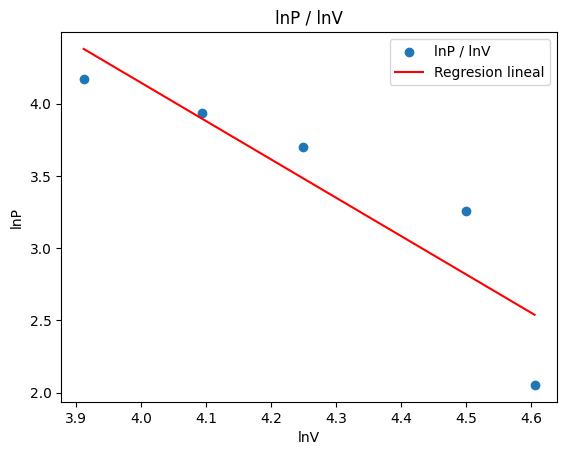

Pendiente: -2.6534722081083983
Interseccion: 14.758973902808755


In [35]:
coef_correlacion = np.corrcoef(y, x)[0,1]
print(f"Coeficiente de correlacion de Pearson {coef_correlacion}")
# creamos el modelo
model = LinearRegression()
# ajustar el modelo
model.fit(x.reshape(-1,1),y)
# coef pendiente y la interseccion
pendiente = model.coef_[0]
interseccion = model.intercept_
# generamos las predicciones
y_pred = model.predict(x.reshape(-1,1))
print(y_pred)
# grafica
plt.scatter(x,y,label='lnP / lnV')
plt.plot(x,y_pred,color='red',label='Regresion lineal')
plt.xlabel('lnV')
plt.ylabel('lnP')
plt.title("lnP / lnV")
plt.legend()
plt.show()
# mostramos valores
print(f'Pendiente: {pendiente}')
print(f'Interseccion: {interseccion}')

In [34]:
print(f'b0 = {interseccion}\nb1 ={pendiente}')

b0 = 14.758973902808755
b1 =-2.6534722081083983
